In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
rain_data211 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172151.csv',encoding='cp949')
rain_data101 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172202.csv',encoding='cp949')
rain_data100 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172215.csv',encoding='cp949')
rain_data212 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172236.csv',encoding='cp949')
rain_data90 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172245.csv',encoding='cp949')

In [ ]:
# rain_data = pd.merge(rain_data211, rain_data101, how='outer')
from functools import reduce

rain_data = reduce(lambda x,y : pd.merge(x,y, on='날짜', how='outer'),[rain_data211, rain_data101, rain_data100, rain_data212, rain_data90])

In [ ]:
print(rain_data)

              날짜  211강수량(mm)  101강수량(mm)  100강수량(mm)  212강수량(mm)  90강수량(mm)
0     2009-01-01         NaN         NaN         NaN         NaN        NaN
1     2009-01-02         NaN         NaN         NaN         NaN        NaN
2     2009-01-03         NaN         NaN         NaN         NaN        NaN
3     2009-01-04         NaN         NaN         NaN         NaN        NaN
4     2009-01-05         NaN         NaN         NaN         NaN        NaN
...          ...         ...         ...         ...         ...        ...
5473  2023-12-27         NaN         NaN         NaN         NaN        NaN
5474  2023-12-28         NaN         NaN         NaN         NaN        NaN
5475  2023-12-29         NaN         NaN         NaN         NaN        NaN
5476  2023-12-30         6.8         9.9         2.3         8.5        0.7
5477  2023-12-31         3.1         5.3         6.0         4.9       26.8

[5478 rows x 6 columns]


In [ ]:
rain_col = [i for i in rain_data.columns if '강수' in i]
rain_data[rain_col] = rain_data[rain_col].fillna(0)

In [ ]:
print(rain_data.isna().sum().sum())
print(rain_data)

0
              날짜  211강수량(mm)  101강수량(mm)  100강수량(mm)  212강수량(mm)  90강수량(mm)
0     2009-01-01         0.0         0.0         0.0         0.0        0.0
1     2009-01-02         0.0         0.0         0.0         0.0        0.0
2     2009-01-03         0.0         0.0         0.0         0.0        0.0
3     2009-01-04         0.0         0.0         0.0         0.0        0.0
4     2009-01-05         0.0         0.0         0.0         0.0        0.0
...          ...         ...         ...         ...         ...        ...
5473  2023-12-27         0.0         0.0         0.0         0.0        0.0
5474  2023-12-28         0.0         0.0         0.0         0.0        0.0
5475  2023-12-29         0.0         0.0         0.0         0.0        0.0
5476  2023-12-30         6.8         9.9         2.3         8.5        0.7
5477  2023-12-31         3.1         5.3         6.0         4.9       26.8

[5478 rows x 6 columns]


In [ ]:
dam_flow = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/only_dam_flow.csv',encoding='utf-8')

print(dam_flow)

              날짜  유입량(㎥/s)
0     2009-01-01     0.000
1     2009-01-02     0.825
2     2009-01-03     3.904
3     2009-01-04     0.000
4     2009-01-05     0.000
...          ...       ...
5473  2023-12-27    25.873
5474  2023-12-28    21.186
5475  2023-12-29    20.887
5476  2023-12-30    29.183
5477  2023-12-31    25.803

[5478 rows x 2 columns]


In [ ]:
data = reduce(lambda x,y : pd.merge(x,y, on='날짜', how='outer'),[rain_data, dam_flow])

In [ ]:
print(max(data['유입량(㎥/s)']))

3918.5


<Axes: xlabel='날짜'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


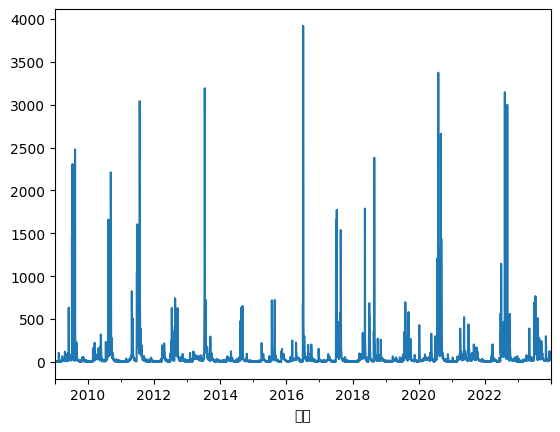

In [ ]:
data.index = pd.to_datetime(data['날짜'])

dam_flow = data['유입량(㎥/s)']
dam_flow.plot()

In [ ]:
data['Y'] = data['유입량(㎥/s)'].shift(-2)
data = data.dropna()

train = data[data['날짜']<'2018-01-01']
valid = data[data['날짜']>='2018-01-01']
valid = valid[valid['날짜']<'2023-01-01']
test = data[data['날짜']>='2023-01-01']
print('train set : ', len(train),"\n",
      'valid set : ', len(valid), "\n",
      'test set : ', len(test), "\n")

trainX, trainY = train.drop(['날짜', 'Y'], axis = 1), train['Y']
validX, validY = valid.drop(['날짜', 'Y'], axis = 1), valid['Y']
testX, testY = test.drop(['날짜', 'Y'], axis = 1), test['Y']

train set :  3287 
 valid set :  1826 
 test set :  363 



In [ ]:
# ## Parameter Setting For Training
# TRAIN_SPLIT = 3285
# BATCH_SIZE = 64
# BUFFER_SIZE = 10000

# ## Parameter in Training
# EVALUATION_INTERVAL = 200
# EPOCHS = 10

# tf.random.set_seed(13)

In [ ]:
len(trainX.columns)


6

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
inputs_1 = tf.keras.Input(shape=6)
dense = tf.keras.layers.Dense(50)(inputs_1)
dense = tf.keras.layers.Dense(50)(dense)
dense = tf.keras.layers.Dense(50)(dense)
dense = tf.keras.layers.Dense(50)(dense)
output = tf.keras.layers.Dense(1)(dense)

model = tf.keras.Model(inputs = [inputs_1], outputs = output)

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss='mse', optimizer=optimizer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense (Dense)               (None, 50)                350       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8051 (31.45 KB)
Trainable params: 8051 (31.45 K

In [ ]:
path_checkpoint = 'checkpoint.keras'

callback_checkpoint = ModelCheckpoint (filepath = path_checkpoint, monitor = 'val_loss',verbose = 1,save_weights_only = True, save_best_only = True)
callback_early_stopping = EarlyStopping(monitor='val_loss', patience = 10, verbose = 0)
callback_reduce_lr = ReduceLROnPlateau(monitor='loss', factor = 0.1, patience = 1, verbose = 1)

callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_reduce_lr]

hist = model.fit(trainX, trainY, validation_data=(validX, validY), epochs = 200, batch_size=1, callbacks=callbacks, verbose=1)

fig, loss_ax = plt.subplots()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper left')

plt.show()

Epoch 1/200
1241/3287 [==========>...................] - ETA: 12s - loss: 58199.6133

In [ ]:
test['날짜'].iloc[0]

In [ ]:
time = pd.to_datetime(test['날짜'])

In [ ]:
pred = model.predict(testX)
plt.figure(figsize = (15,3))
plt.plot(time, testY.reset_index()['Y'])
plt.plot(time, pred)
plt.ylabel('유입량')
plt.legend(['real', 'predict'])

In [ ]:
print('RMSE = ',round((((testY.values-[i[0] for i in pred])**2).sum()/len(pred))**0.5,4))